In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Sequential

In [2]:
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
housing = pd.read_csv('./data/housing.csv')

In [4]:
X = housing.drop(columns='median_house_value')
y = housing.median_house_value.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature scaling

* Features haben unterschiedliche Wertebereiche
  population: [0, 35000] vs median_income: [0, 15]
![scaling](./assets/scaling.png)
* Feature scaling bringt alle Features zusammen
* *Normalization* x -> [0, 1] $$x' = \frac{x-x_{min}}{x_{max} - x_{min}}$$
* *Standardization* x -> Standardnormalverteilt  $$x' = \frac{x-\mu}{\sigma}$$

Wichtig bei
* Algorithmen, die mit Distanzen arbeiten (SVM, ...)
* ANNs

In [5]:
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [6]:
transformer = ColumnTransformer(transformers=[
    ('imputer', SimpleImputer(strategy='mean'), ['total_bedrooms']),
    ('one_hot', OneHotEncoder(), ['ocean_proximity']),
], remainder='passthrough')

pipeline = Pipeline([
    ('column_transformer', transformer),
    ('scaler', RobustScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

## Biologisches Neuron

![Biological neuron](https://ib.bioninja.com.au/_Media/neuron_med.jpeg)

* Inputs in Form von elektrischen Signalen
* Input kommt über Dendriten
* Falls Summe der Inputs Schwelle(*Aktivierungspotential*) überschreitet, wird Signal weitergeleitet

## Künstliches Neuron(*Perceptron*)

![Artificial neuron](https://www.theprojectspot.com/images/post-assets/an.jpg)

* Inputs (x_i) sind die Features einer Observation
* Die Inputs werden verschieden gewichtet (w_i)
* Lernen => Gewichte adaptieren
* $$ output = f(\sum_i x_iw_i) = f(\vec{x}\vec{w}^T) $$

In [7]:
perceptron = Sequential([
    Input(shape=X_train.shape[1]),
    Dense(units=1)
])

perceptron.build()

In [8]:
perceptron.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(13, 1) dtype=float32, numpy=
 array([[-0.4816589 ],
        [ 0.12017161],
        [ 0.5426295 ],
        [ 0.25664514],
        [-0.5406373 ],
        [ 0.43173027],
        [-0.4146523 ],
        [ 0.14796895],
        [ 0.46277273],
        [ 0.51222956],
        [ 0.09196264],
        [ 0.50153744],
        [-0.3163899 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

### Training

* optimizer: wie wird auf Fehler reagiert
* loss: wie wird Fehler gemessen
* batch_size: observations, welche analysiert werden zwischen 2 weight-Anpassungen
* epochs: wie oft alle Trainingsdaten analysiert werden

In [9]:
perceptron.compile(optimizer='adam', loss='mse')

history = perceptron.fit(X_train, y_train,
                         validation_data=(X_test, y_test),
                         batch_size=32,
                         epochs=5,
                         verbose=1)

Epoch 1/5
516/516 [==============================] - 0s 341us/step - loss: 56296824832.0000 - val_loss: 55333466112.0000
Epoch 2/5
516/516 [==============================] - 0s 263us/step - loss: 56295964672.0000 - val_loss: 55332638720.0000
Epoch 3/5
516/516 [==============================] - 0s 260us/step - loss: 56295100416.0000 - val_loss: 55331799040.0000
Epoch 4/5
516/516 [==============================] - 0s 257us/step - loss: 56294277120.0000 - val_loss: 55330963456.0000
Epoch 5/5
516/516 [==============================] - 0s 264us/step - loss: 56293416960.0000 - val_loss: 55330152448.0000


In [10]:
perceptron.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(13, 1) dtype=float32, numpy=
 array([[ 1.5951841],
        [ 2.6270328],
        [ 3.0088704],
        [ 0.4563945],
        [ 1.7239332],
        [ 2.7195568],
        [-2.8316965],
        [ 2.6041188],
        [ 0.7912322],
        [ 2.6290278],
        [ 2.0382388],
        [ 2.5791705],
        [ 1.9439623]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([2.5681264], dtype=float32)>]

<Axes: >

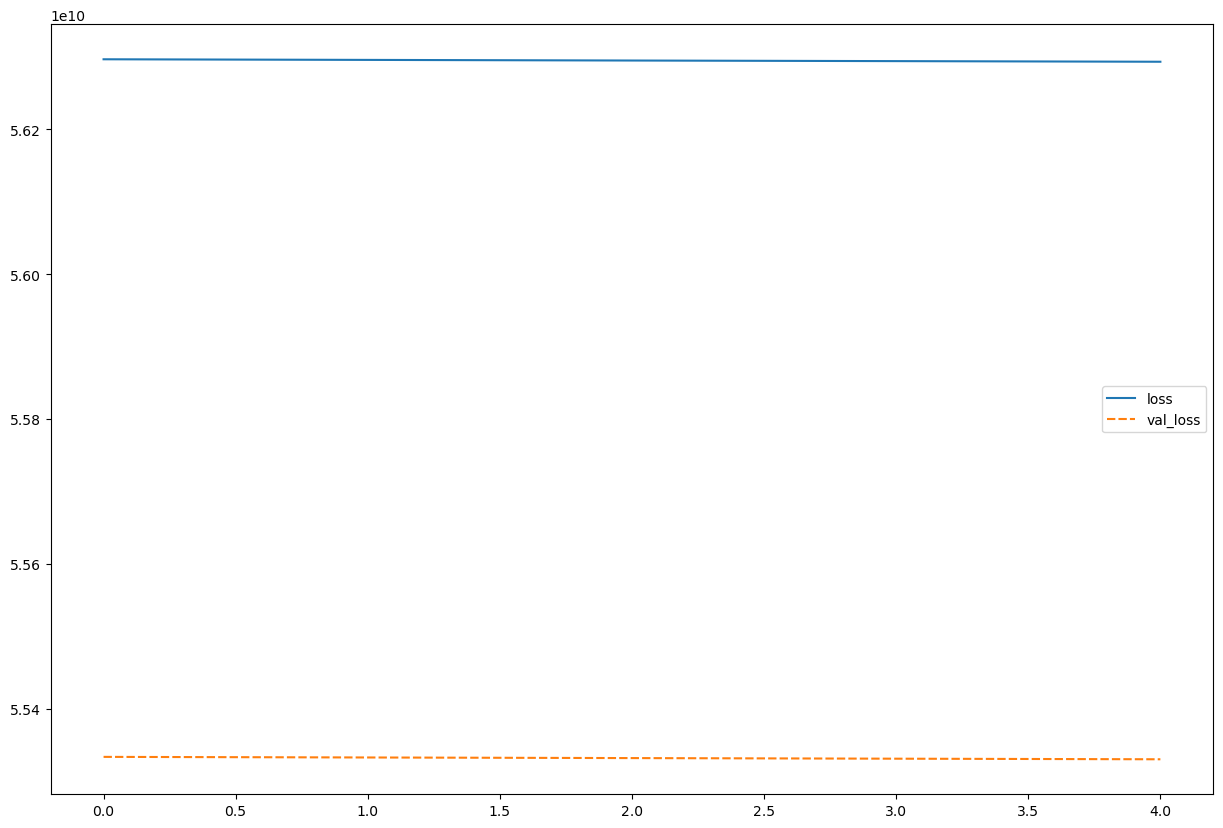

In [11]:
sns.lineplot(data=history.history)

## Mehr Neuronen!

In [15]:
ann = Sequential([
    Input(shape=X_train.shape[1]),
    Dense(units=64),
    Dense(units=64),
    Dense(units=1)
])

Epoch 1/15
516/516 [==============================] - 0s 415us/step - loss: 54757388288.0000 - val_loss: 49386176512.0000
Epoch 2/15
516/516 [==============================] - 0s 347us/step - loss: 40172068864.0000 - val_loss: 29576589312.0000
Epoch 3/15
516/516 [==============================] - 0s 354us/step - loss: 21708335104.0000 - val_loss: 14968951808.0000
Epoch 4/15
516/516 [==============================] - 0s 360us/step - loss: 11235330048.0000 - val_loss: 8472605696.0000
Epoch 5/15
516/516 [==============================] - 0s 375us/step - loss: 7082941440.0000 - val_loss: 6312098304.0000
Epoch 6/15
516/516 [==============================] - 0s 379us/step - loss: 5774293504.0000 - val_loss: 5659761664.0000
Epoch 7/15
516/516 [==============================] - 0s 358us/step - loss: 5340431872.0000 - val_loss: 5405730816.0000
Epoch 8/15
516/516 [==============================] - 0s 353us/step - loss: 5152276992.0000 - val_loss: 5264716800.0000
Epoch 9/15
516/516 [=============

<Axes: >

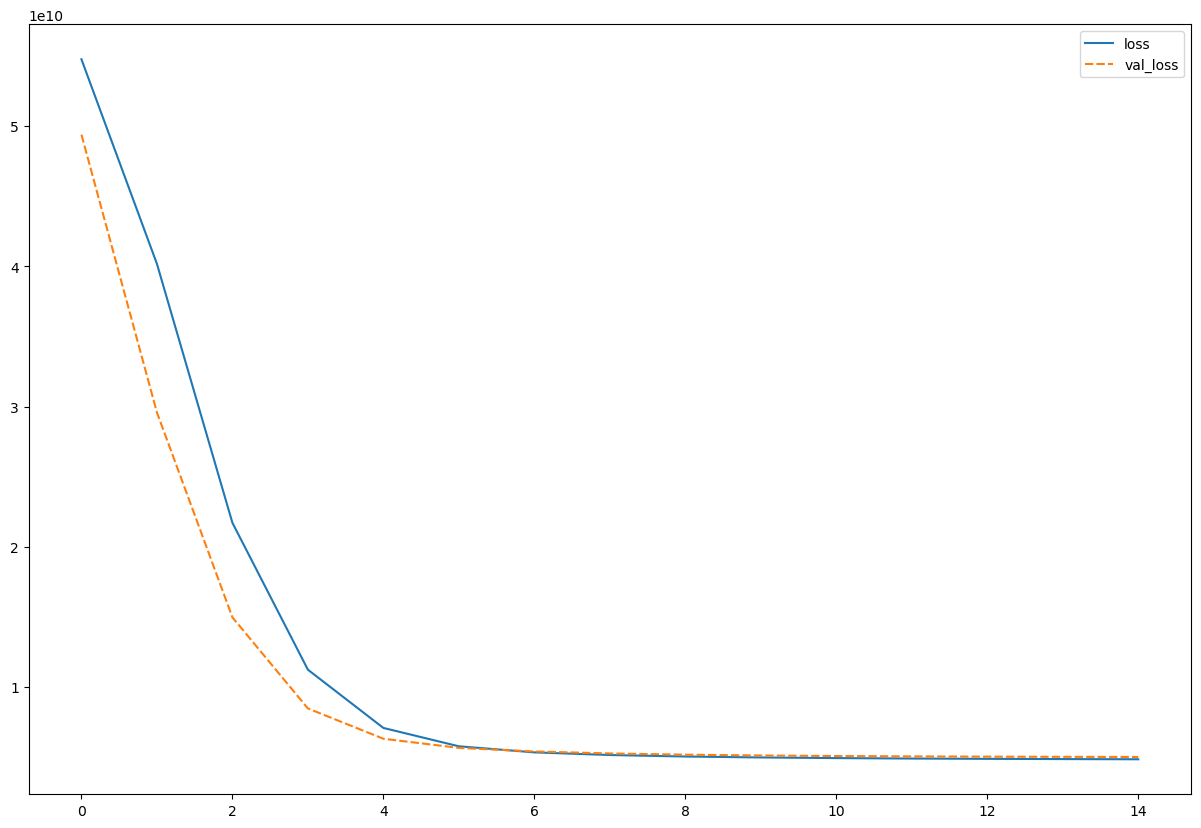

In [16]:
ann.compile(optimizer='adam', loss='mse')

history = ann.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  batch_size=32,
                  epochs=15)

sns.lineplot(data=history.history)

In [17]:
np.sqrt(mean_squared_error(y_true=y_test, y_pred=ann.predict(X_test)))

129/129 [==============================] - 0s 248us/step


70802.36172776746